In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

data = pd.read_excel('nba_player_data.xlsx')

# DATA CLEANING & ANALYSIS PREPARATION

In [8]:
data.drop(columns=['RANK','EFF'],inplace=True) #removing unneeded columns

In [9]:
# data['season_start_year'] = data['Year'].str[:4].astype(int) #updating/clean up the year section and convert to int (from object)
data['Year'] = data['Year'].str[:4].astype(int)
# data.rename(columns={'Year':'Season Start Year'}, inplace=True)

In [10]:
data['Season_type'].replace('Regular%20Season', 'RS', inplace=True)

C:\Users\Dean\AppData\Local\Temp\ipykernel_20860\2557280986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Season_type'].replace('Regular%20Season', 'RS', inplace=True)


In [39]:
rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [41]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')

In [43]:
total_cols = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

# Which player stats are correlated with each other

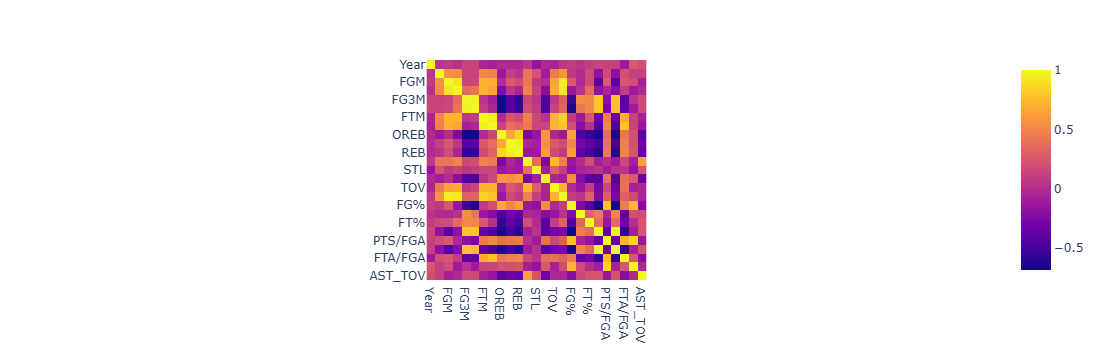

In [46]:
data_per_min = data.groupby(['PLAYER','PLAYER_ID','Year'])[total_cols].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col]/data_per_min['MIN']

data_per_min['FG%'] = data_per_min['FGM']/data_per_min['FGA']
data_per_min['3PT%'] = data_per_min['FG3M']/data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM']/data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A']/data_per_min['FGA']
data_per_min['PTS/FGA'] = data_per_min['PTS']/data_per_min['FGA']
data_per_min['FG3M/FGM'] = data_per_min['FG3M']/data_per_min['FGM']
data_per_min['FTA/FGA'] = data_per_min['FTA']/data_per_min['FGA']
data_per_min['TRU%'] = 0.5*data_per_min['PTS']/(data_per_min['FGA']+0.475*data_per_min['FTA'])
data_per_min['AST_TOV'] = data_per_min['AST']/data_per_min['TOV']

data_per_min = data_per_min[data_per_min['MIN']>=50]
data_per_min.drop(columns='PLAYER_ID', inplace=True)

fig = px.imshow(data_per_min.corr(numeric_only = True))
fig


In [48]:
(data_per_min['MIN']>=50).mean()

1.0

# Minutes Distribution

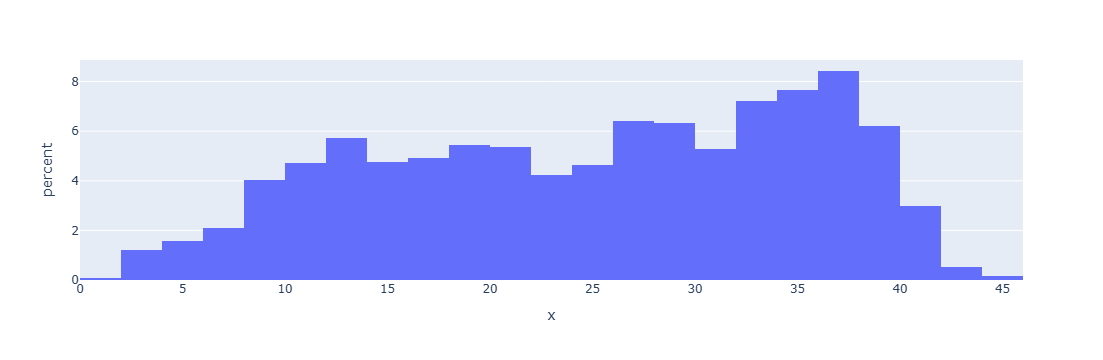

In [51]:
fig = px.histogram(x=playoffs_df['MIN'],histnorm ='percent')
fig.show()

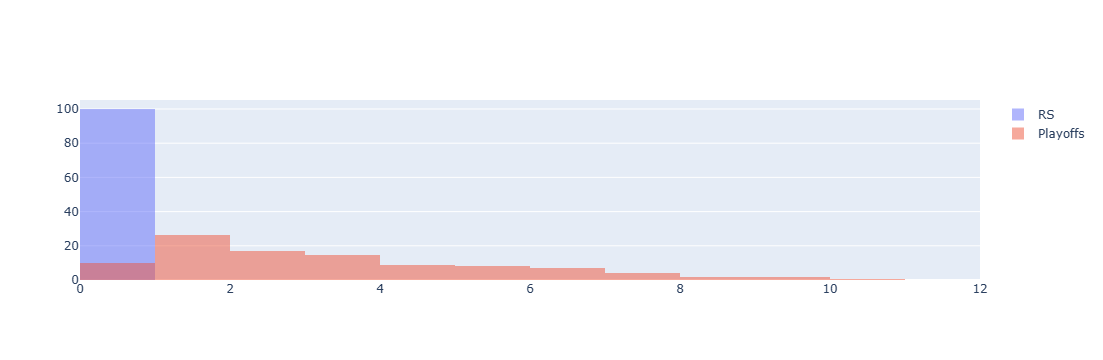

In [57]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=rs_df['MIN']/rs_df['GP'], histnorm ='percent',name='RS',xbins = {'start':0,'end':46,'size':1}))
fig.add_trace(go.Histogram(x=playoffs_df['MIN']/playoffs_df['GP'], histnorm ='percent',name='Playoffs',xbins = {'start':0,'end':46,'size':1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()